# Tutorial: Scatter Plots in Python

In this tutorial, we will walk through how to make scatter plots in Python, using Matplotlib and Seaborn. We will be using the Pokemon dataset as an example. It can also be used as a quick reference when you are plot scatter graphs in Python.

## Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../input/pokemon.csv")
data.shape

(801, 41)

In [2]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


## Basic Scatter Plots

We can plot by matplotlib or seaborn. For matplotlib, we can either call the .plot.scatter() method in pandas, or use plt.scatter(). For seaborn, we use sns.scatter() function. As an example, we plot the defense vs attach values for 1st-generation Pokemons.

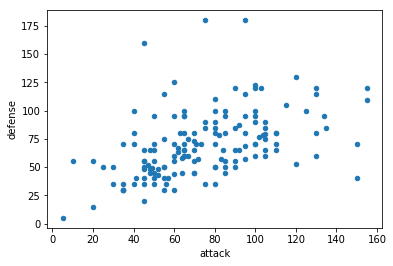

In [3]:
g1 = data.loc[data.generation==1,:]
# dataframe.plot.scatter() method
g1.plot.scatter('attack', 'defense'); # The ';' is to avoid showing a message before showing the plot

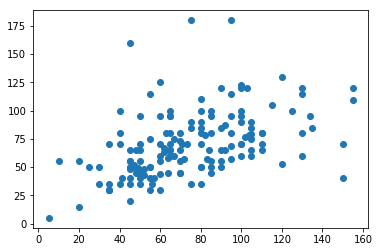

In [4]:
# plt.scatter() function
plt.scatter('attack', 'defense', data=g1);

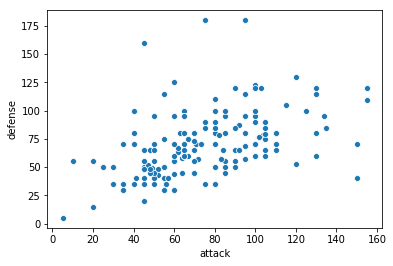

In [5]:
# sns.scatterplot() function
sns.scatterplot('attack', 'defense', data=g1);

We can customize the size, color, and marker style of a plot by 's', 'c' and 'marker' arguments respectively in matplotlib. We can also specify the size of the plot:

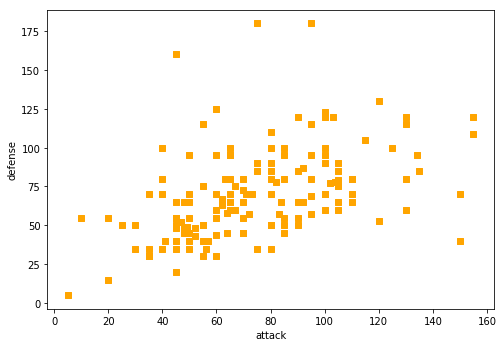

In [6]:
g1.plot.scatter('attack', 'defense', s = 40, c = 'orange', marker = 's', figsize=(8,5.5));

Documentation and Reference:
- [pandas.DataFrame.plot.scatter()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
- [matplotlib.pyplot.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [seaborn.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- [List of markers](https://matplotlib.org/api/markers_api.html)
- [List of color names](https://matplotlib.org/gallery/color/named_colors.html)

## Scatter Plots by Factors

Here we are going to demonstrate how to make scatter plots where the data can be separated into two or more groups, according to value of another (usually factor) varible.

In matplotlib, it is advisable to plot group by group using each subset of data:

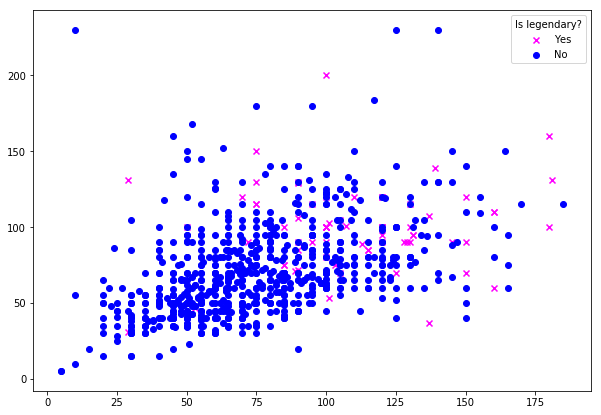

In [7]:
plt.figure(figsize=(10,7)) # Specify size of the chart
plt.scatter('attack', 'defense', data=data[data.is_legendary==1], marker = 'x', c = 'magenta')
plt.scatter('attack', 'defense', data=data[data.is_legendary==0], marker = 'o', c = 'blue')
plt.legend(('Yes', 'No'), title='Is legendary?')
plt.show()

In Seaborn, we can specify the 'hue' argument so it will automatically plot the chart using different colors for different groups, and the lengends are shown automatically:

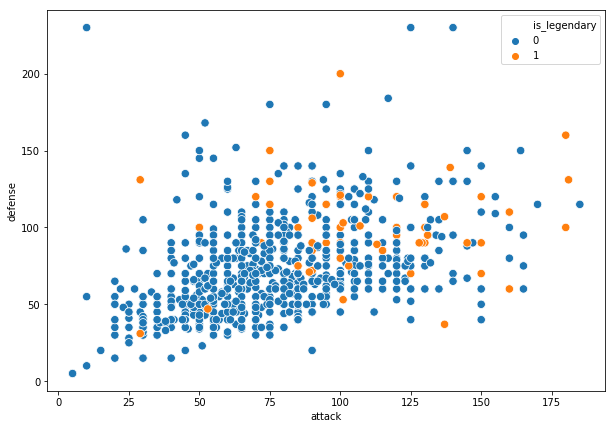

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'attack', y = 'defense', s = 70, hue ='is_legendary', data=data); # hue represents color

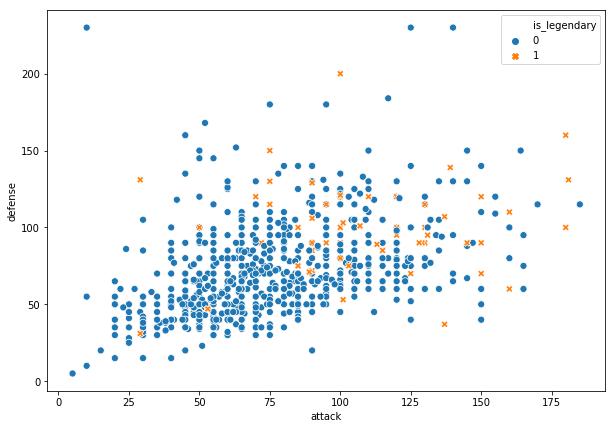

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'attack', y = 'defense', s = 50, hue = 'is_legendary', 
                style ='is_legendary', data=data); # style represents marker

When there are many classes in the variable we want to distinguish in a chart, using Seaborn is more convenient.

In the following chart we add the title and use a larger font size for axis labels as well:

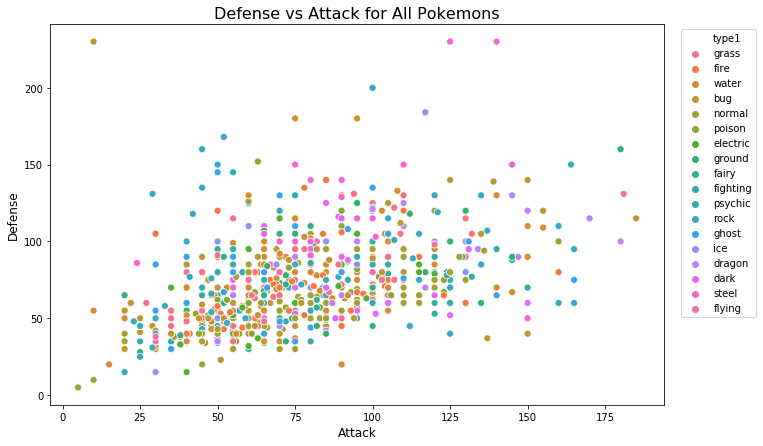

In [30]:
plt.figure(figsize=(11,7))
sns.scatterplot(x = 'attack', y = 'defense', s = 50, hue = 'type1', data=data)
plt.legend(bbox_to_anchor=(1.02, 1)) # move legend to outside of the chart
plt.title('Defense vs Attack for All Pokemons', fontsize=16)
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Defense', fontsize=12)
plt.show()

## Labelling Extremes and Outliers

In scatter plots, the data points at the extremes (very low or very high) are the most eye-catching and we may want to know immediately what they are. The following part demonstrate how to annotate on the charts with necessary information. As an example, we are plotting the relationship between weight and height for 'water' type Pokemons:

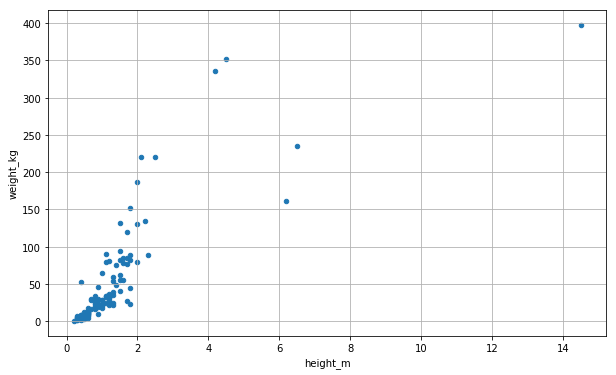

In [38]:
water = data[data.type1 == 'water']
water.plot.scatter('height_m', 'weight_kg', figsize=(10,6))
plt.grid(True) # add gridlines
plt.show()

There are a few points that are high on the x-axis. We want to show who they are in the charts by using plt.annotate() function. In addition, we modify the axes so that both have minimum of zero (after all, height and weight could not be zero!).

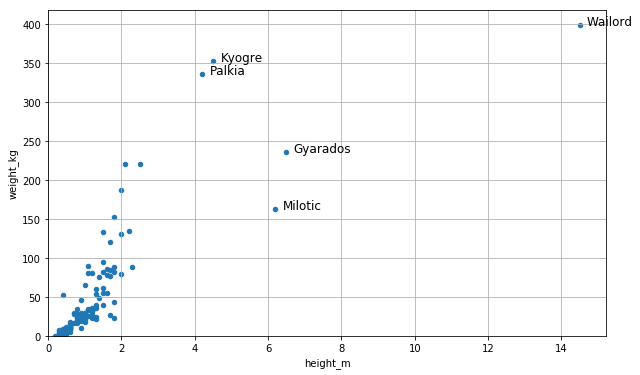

In [66]:
water.plot.scatter('height_m', 'weight_kg', figsize=(10,6))
plt.grid(True)
for index, row in water.nlargest(5, 'height_m').iterrows():
    plt.annotate(row['name'], # text to show
                 xy = (row['height_m'], row['weight_kg']), # the point to annotate 
                 xytext = (row['height_m']+0.2, row['weight_kg']), # where to show the text
                 fontsize=12)
plt.xlim(0, ) # x-axis has minimum 0
plt.ylim(0, ) # y-axis has minimum 0
plt.show()

In the above code, **water.nlargest(5, 'height_m')** is subsetting for the five tallest Pokemons and .iterrows() means we iterate for each row.

See the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html) and [tutorial](https://matplotlib.org/tutorials/text/annotations.html) for more information about annotation with matplotlib.

## Add Regression Lines

We will show how to add regression lines into the scatter plots to show the approximate linear relationships. In this example we plot the attack against speed using lmplot() function in Seaborn:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x504 with 0 Axes>

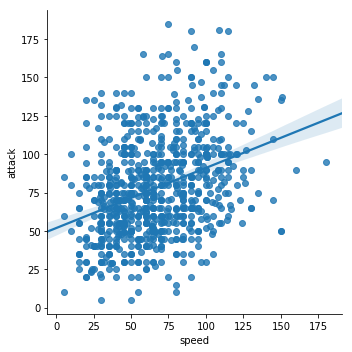

In [100]:
plt.figure(figsize=(10,7))
sns.lmplot(x = "speed", y = "attack", data=data);

Note that plt.figure() doesn't work for lmplot() charts. To specify the figure size, use height and aspect arguments inside the lmplot() function:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


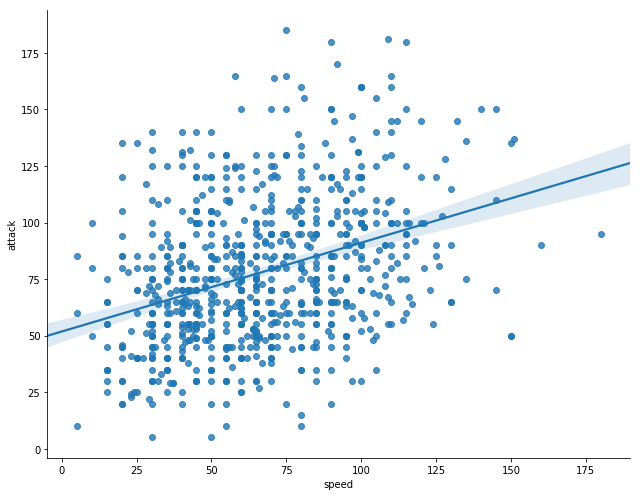

In [103]:
sns.lmplot(x = "speed", y = "attack", data=data, height = 7, aspect = 9/7); # Make a 9x7 size plot

The hue argument enables fitting separate regression lines for different groups. We also remove the shaded area around the regression lines which represents confidence intervals of estimates:

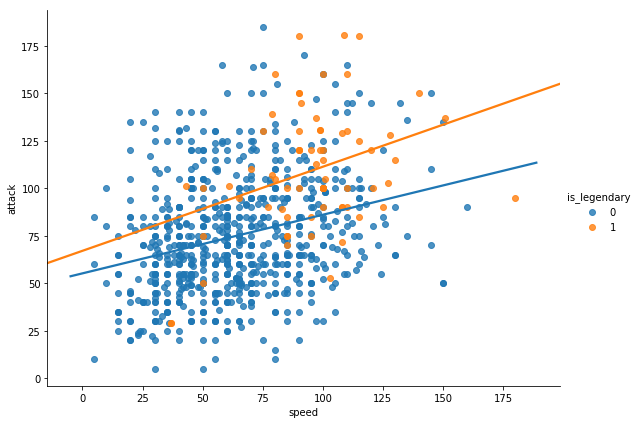

In [105]:
sns.lmplot(x = "speed", y = "attack", hue = 'is_legendary', ci = None, data=data, height = 6, aspect = 8/6);

Please refer to Seaborn documentation for [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html) function for more information.

That's it for now. Happy plotting!